# Acessing CSV data

In [2]:
%reload_ext autoreload
%autoreload 2

import os
from os.path import join
from glob import glob
from random import randint
from pathlib import Path

import numpy as np
import pandas as pd
import cv2 as cv
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
DATA_STORE = '/data_store/'
dir_datasets = join(DATA_STORE, 'datasets/people')
dir_lfw = join(dir_datasets, 'lfw')
dir_lfw_metadata = join(dir_lfw, 'metadata')

## Files

In [51]:
# set fp_
fp_identities = join(dir_lfw_metadata, 'identities.csv')
fp_files = join(dir_lfw_metadata, 'image_files.csv')
fp_index = join(dir_lfw_metadata, 'image_index.csv')
fp_rois = join(dir_lfw_metadata, 'image_rois.csv')
fp_uuids = join(dir_lfw_metadata, 'image_uuids.csv')
fp_pose = join(dir_lfw_metadata, 'image_pose.csv')
fp_vecs = join(dir_lfw_metadata, 'image_vecs.csv')

In [66]:
# load csvs into dataframes
df_identities = pd.read_csv(fp_identities).set_index('index')
df_files = pd.read_csv(fp_files).set_index('index')
df_index = pd.read_csv(fp_index).set_index('index')
df_rois = pd.read_csv(fp_rois).set_index('index')
df_uuids = pd.read_csv(fp_uuids).set_index('index')
df_pose = pd.read_csv(fp_pose).set_index('index')
df_vecs = pd.read_csv(fp_vecs).set_index('index')

### Identity attributes

- preview identities
- here the 'index' is unique and refers to the identity
- in other files it is referred to as 'identity_index'

In [57]:
df_identities.head(2)

name       description gender  images  image_index
index                                                          
0      A. J. Cook  Canadian actress      f       1            0
1        AJ Lamas    American actor      m       1            1

### File attributes

- preview files
- NB: this information is not needed for the website
- information needed to load an image from the local directory

In [54]:
df_files.head(2)

ext             fn    subdir
index                              
0      jpg   AJ_Cook_0001   AJ_Cook
1      jpg  AJ_Lamas_0001  AJ_Lamas

### Index

- every image has an index
- the `identity_index` refers back to the `identities.csv` file

In [55]:
df_index.head(2)

sha256  identity_index
index                                                                   
0      550937b71b9af36b6083fa1ce7c76e97e3254c439614a6...               0
1      46d7ddeec9b00add61ade2f89277d74e8264a2b6cec193...               1

### ROIs (regions of interest)

- refers to the detected face in image files

In [56]:
df_rois.head(2)

h  image_height  image_index  image_width         w         x  \
index                                                                         
0      0.330000           250            0          250  0.330000  0.336667   
1      0.393333           250            1          250  0.393333  0.286667   

              y  
index            
0      0.350000  
1      0.313333

### UUIDs

- a separate file that includes the UUID for each image file
- separated to reduce file size for larger CSVs

In [43]:
df_uuids.head(2)

uuid
index                                      
0      f03fd921-2d56-4e83-8115-f658d6a72287
1      0c96c5bb-dbd1-4584-bd68-af11664b98bb

### Pose

- a separate file that includes pose information
- used for filtering out images that are too angled

In [44]:
df_pose.head(2)

image_index      pitch       roll        yaw
index                                              
0                0  11.162645  10.415886  22.997190
1                1  20.788283  -9.626046 -11.075164

### Face vectors

- each face vector is associated with an ROI
- each ROI is associated with an image and an identity

In [45]:
df_vecs.head(2)

image_index  roi_index  \
index                           
0                0          0   
1                1          1   

                                                     vec  
index                                                     
0      -0.0776684582233429,0.13982562720775604,-0.001...  
1      -0.12392709404230118,0.07749050855636597,0.026...

# Operations

In [50]:
# given a vector index, get identity meta and image
vector_idx = 1
# create a pandas.core.series.Series (ds) to store the row results
ds_vec = df_vecs.iloc[vector_idx]
# get the ROI index
roi_idx = ds_vec.image_index
# get the image index
image_index = ds_vec.roi_index
print(f'vector_idx: {vector_idx} --> roi_idx: {roi_idx}, image_index: {image_index}')

vector_idx: 1 --> roi_idx: 1, image_index: 1


In [70]:
# use the roi index to get identity index from the identity DataFrame
ds_index = df_index.iloc[image_index]
# now get the identity index
identity_idx = ds_index.identity_index
# then use the identity index to get the identity meta
ds_identity = df_identities.iloc[identity_idx]
# get the name and description
name = ds_identity.fullname
desc = ds_identity.description
gender = ds_identity.gender
nimages = ds_identity.images
print(f'name: {name}, description: {desc}, gender: {gender}, images: {nimages}')

name: AJ Lamas, description: American actor, gender: m, images: 1


In [73]:
# use the image index to get file meta
ds_file = df_files.iloc[image_index]
fn = ds_file.fn
subdir = ds_file.subdir
ext = ds_file.ext
fp_im = join(dir_lfw, 'images', subdir, f'{fn}.{ext}')
print(fp_im)

/data_store/datasets/people/lfw/images/AJ_Lamas/AJ_Lamas_0001.jpg


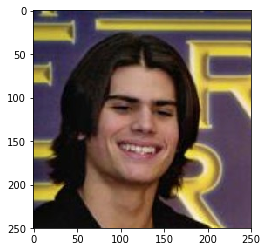

In [74]:
# plot image
im = cv.imread(fp_im)
im_rgb = cv.cvtColor(im, cv.COLOR_BGR2RGB)
plt.imshow(im_rgb)